## GRIP : The Spark Foundation

## Task 6: Prediction using Decision Tree Algorithm

## By:- Abhishek Pathak

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Importing Data in a dataframe

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dropping unrequired columns

In [3]:
df.drop(('Id'), axis = 1, inplace = True)

### Checking for Null values

In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

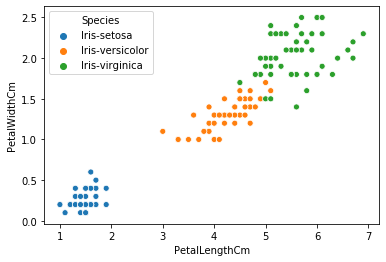

In [6]:
sns.scatterplot(data = df, x = "PetalLengthCm", y="PetalWidthCm", hue = 'Species')

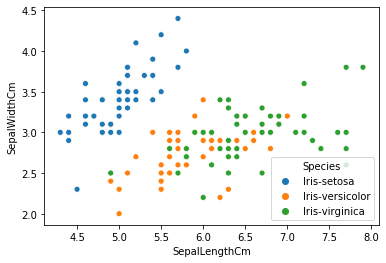

In [7]:
sns.scatterplot(data = df, x = "SepalLengthCm", y="SepalWidthCm", hue = "Species")

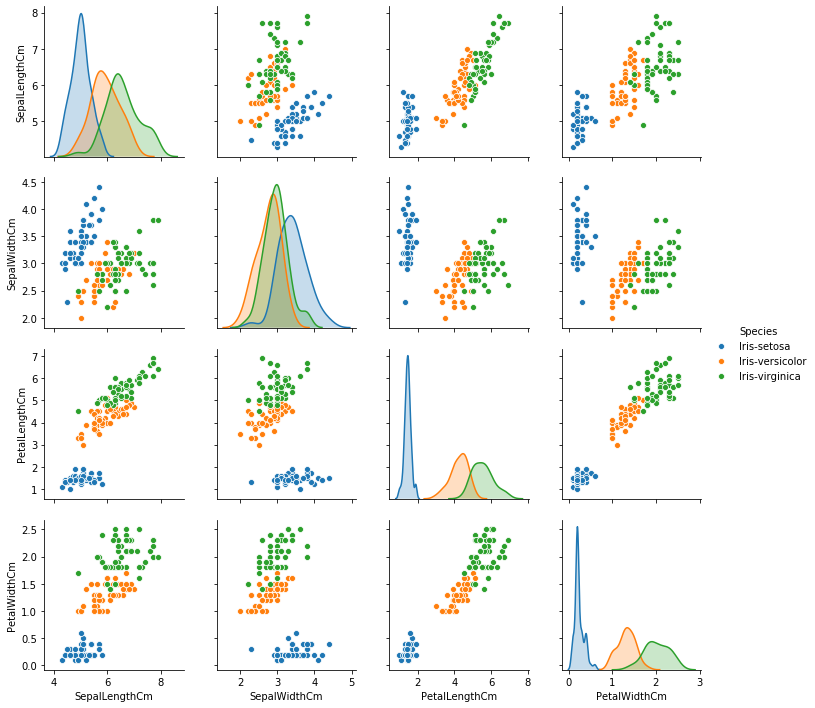

In [8]:
sns.pairplot(df, kind = "scatter",  hue = 'Species')

### Finding Outliers in data set

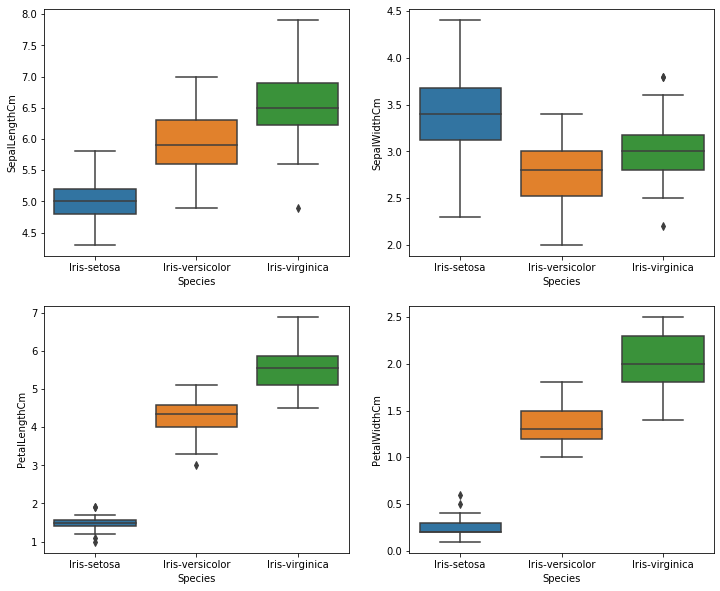

In [9]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=df)

### Dividing features of data into X and y

In [10]:
X = df.drop('Species', axis = 1)
y = df.Species

### Splitting data into train and test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.77, random_state=0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(115, 4)
(35, 4)
(115,)
(35,)


### Training the Decision Tree Classifier Model

In [13]:
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)
print("Training complete.")

Training complete.


### Predicting the values for test data

In [14]:
y_pred = DTree.predict(X_test)

### Checking Accuracy

In [15]:
DTree.score(X_test, y_test)

1.0

### Comparing Actual and Predicted values

In [16]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


### Visualizing the Desicion Tree Graph

Text(0.5, 1.0, 'Decision Tree')

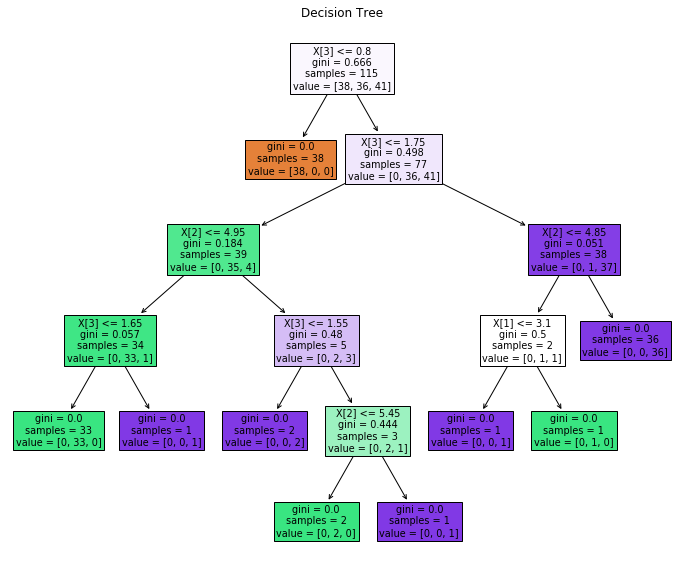

In [17]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(DTree, filled = True)
plt.title("Decision Tree")